In [16]:
import yastn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from analytical_results import fT00, fT01, fT11, fj0, fj1, fnu, fLn
from ploting import plot_heatmaps

from scripts_fermions.operators import Qp, Qm, measure_local_observables

import yastn.tn.mps as mps

In [3]:
g = 1
v, Q = 1, 1
tol, method = 1e-6, '12site'
#
ms = [0, 0.1, 0.2, 0.318309886, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
mg = [g * x for x in ms]
NaDdt =  [(512, 0.125, 512, 1/16),]

data = {}

for m in ms:
    for N, a, D, dt in NaDdt:
        D0 = D
        folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method, mkdir=False)
        data[m, N, a, D, dt] = np.load(folder / f"results.npy", allow_pickle=True).item()

In [4]:
state = {}
ops = yastn.operators.SpinlessFermions(sym='U1')
for m in ms:
    for N, a, D, dt in NaDdt:
        D0 = D
        folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method, mkdir=False)
        tmp = np.load(folder / f"state_t=8.0000.npy", allow_pickle=True).item()
        state[m, N, a, D, dt] = yastn.tn.mps.load_from_dict(ops.config, tmp['psi'])

In [5]:
NUM_COLORS = 11
cm = plt.get_cmap('gist_rainbow')
colors = [cm(i / NUM_COLORS) for i in range(NUM_COLORS)]
lines = [':', '--', '-.']

In [14]:
N, a, D, dt = NaDdt[0]
n = np.arange(N)
qp = Qp(n, 8, (N - 1) / 2, a, v, Q)
qm = Qm(n, 8, (N - 1) / 2, a, v, Q)
# plt.plot(qp)
# plt.plot(qm)
# plt.xlim([318, 321])

print((N - 1) / 2 - 8 * v / a)
print((N - 1) / 2 + 8 * v / a)

191.5
319.5


In [ ]:
CP = mps.generate_mpo(ops.I(), [mps.Hterm(1/np.sqrt(2), 319, ops.cp()),
                                mps.Hterm(1/np.sqrt(2), 320, ops.cp())], N=N)
CM = mps.generate_mpo(ops.I(), [mps.Hterm(1/np.sqrt(2), 191, ops.c()),
                                mps.Hterm(1/np.sqrt(2), 192, ops.c())], N=N)

m = 0
psi = state[m, N, a, D, dt]
psi = CP @ CM @ psi

print(mps.vdot(psi, psi))
psi = psi / psi.norm()

T00i, T11i, T01i, j0i, j1i, nui, Lni = measure_local_observables(state[m, N, a, D, dt], 8, a, g, m, v, Q, ops)
T00f, T11f, T01f, j0f, j1f, nuf, Lnf = measure_local_observables(psi, 8, a, g, m, v, 0, ops)

(0.2862423975613344-4.0245584642661925e-16j)


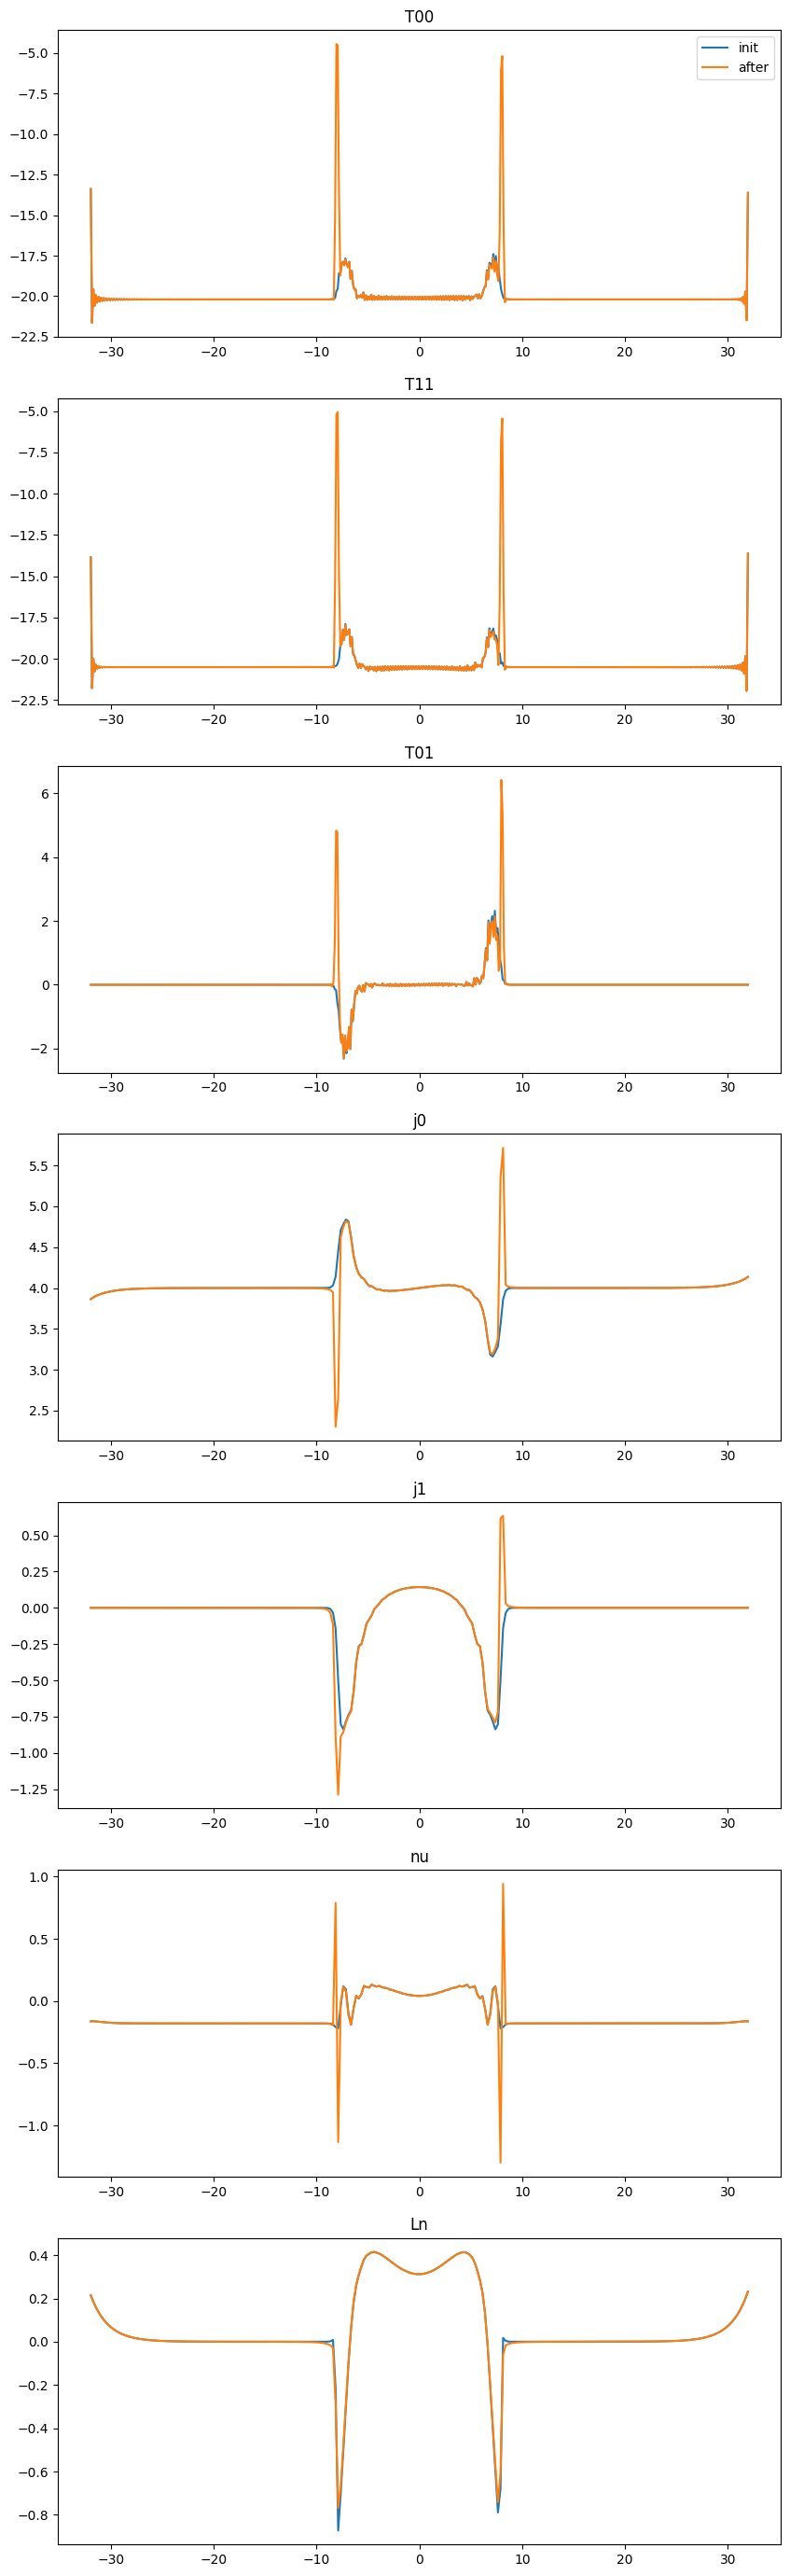

In [53]:
fig, ax = plt.subplots(7, 1, figsize=(10, 35))

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(T00i))
ax[0].plot(xx, T00i, label='init')
ax[0].plot(xx, T00f, label='after')
ax[0].set_title('T00')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(T11i))
ax[1].plot(xx, T11i, label='init')
ax[1].plot(xx, T11f, label='after')
ax[1].set_title('T11')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(T01i))
ax[2].plot(xx, T01i)
ax[2].plot(xx, T01f)
ax[2].set_title('T01')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(j0i))
ax[3].plot(xx, j0i)
ax[3].plot(xx, j0f)
ax[3].set_title('j0')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(j1i))
ax[4].plot(xx, j1i)
ax[4].plot(xx, j1f)
ax[4].set_title('j1')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(nui))
ax[5].plot(xx, nui)
ax[5].plot(xx, nuf)
ax[5].set_title('nu')


Lni = (Lni[1::2] + Lni[0::2]) / 2
Lnf = (Lnf[1::2] + Lnf[0::2]) / 2
xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(Lni))
ax[6].plot(xx, Lni)
ax[6].plot(xx, Lnf)
ax[6].set_title('Ln')

ax[0].legend()



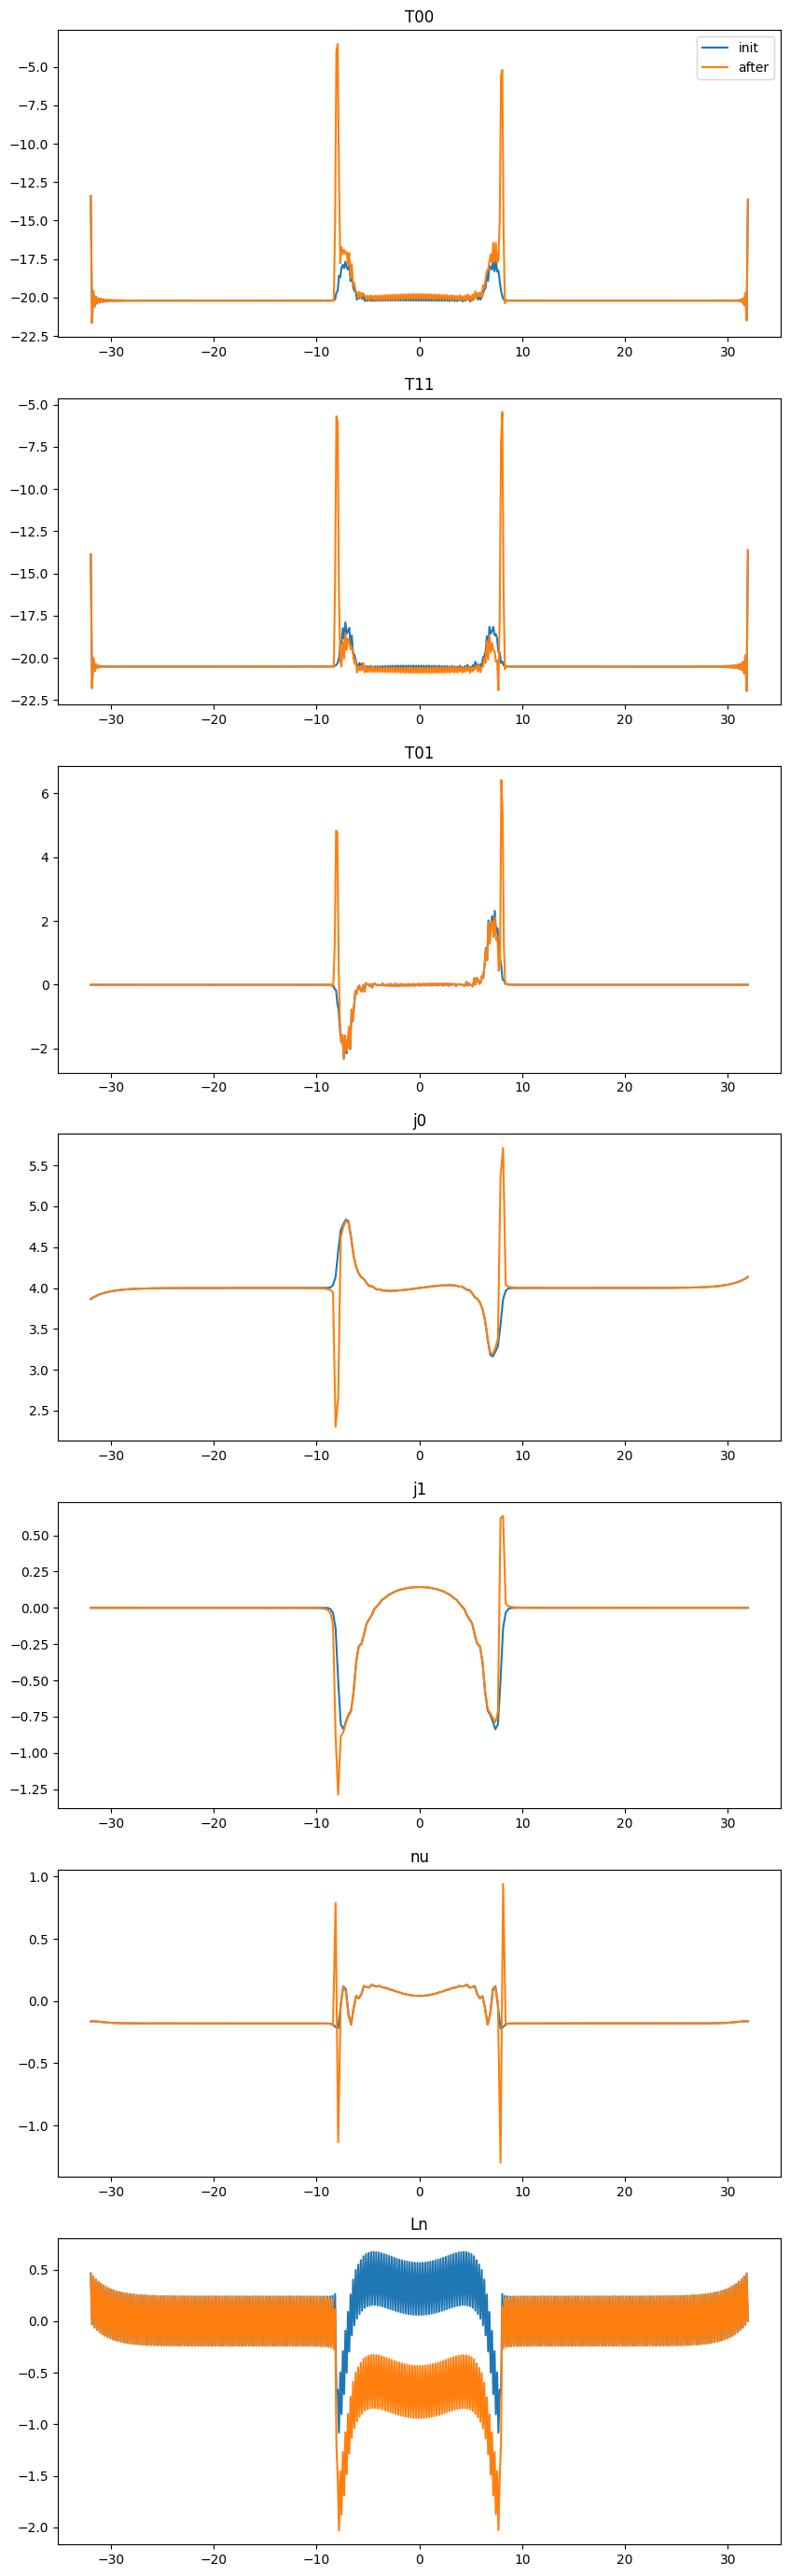

In [46]:
fig, ax = plt.subplots(7, 1, figsize=(10, 35))

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(T00i))
ax[0].plot(xx, T00i, label='init')
ax[0].plot(xx, T00f, label='after')
ax[0].set_title('T00')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(T11i))
ax[1].plot(xx, T11i, label='init')
ax[1].plot(xx, T11f, label='after')
ax[1].set_title('T11')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(T01i))
ax[2].plot(xx, T01i)
ax[2].plot(xx, T01f)
ax[2].set_title('T01')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(j0i))
ax[3].plot(xx, j0i)
ax[3].plot(xx, j0f)
ax[3].set_title('j0')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(j1i))
ax[4].plot(xx, j1i)
ax[4].plot(xx, j1f)
ax[4].set_title('j1')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(nui))
ax[5].plot(xx, nui)
ax[5].plot(xx, nuf)
ax[5].set_title('nu')

xx = np.linspace(-a * (N - 1) / 2, a * (N - 1) / 2, len(Lni))
ax[6].plot(xx, Lni)
ax[6].plot(xx, Lnf)
ax[6].set_title('Ln')

ax[0].legend()

